# Práctica 4 - Belén Rodríguez Llorente & Octavian Rotita Ion

Las librerías a usar en esta práctica son:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
!pip install pulp

# Ejercicio 1

A partir de los datos del fichero svm_nolineal.txt y utilizando bien una librería de optimización apropiada o bien un algoritmo específicamente programado por ti para resolver problemas de optimización cuadrática:


Comencemos cargando los datos:

In [ ]:
!git clone https://github.com/belenllornte/Practica_4_MOPT

fatal: destination path 'Practica_4_MOPT' already exists and is not an empty directory.


In [ ]:
# Leemos el dataset subido al repositorio:
df = pd.read_csv('Practica_4_MOPT/svm_nolineal.txt', delim_whitespace=True,skiprows=2, names=['x1', 'x2', 'y'])
# Verificamos los primeros registros y obeservamos que tiene 2 variables independientes (x1,x2) y una variable dependiente (y)
print(df.head())

    x1   x2  y
0  0.0  0.0 -1
1  1.0  1.0 -1
2 -1.0  1.0 -1
3 -2.0 -1.0 -1
4  0.0 -2.0 -1


<ipython-input-18-9dd499af7f24>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('Practica_4_MOPT/svm_nolineal.txt', delim_whitespace=True,skiprows=2, names=['x1', 'x2', 'y'])


In [ ]:
# Extraemos las características (X) y las etiquetas (y)
X = df[['x1', 'x2']].values  # Convertir a matriz NumPy
y = df['y'].values           # Convertir a vector NumPy

Antes de todo, veamos una representación gráfica de los valores :

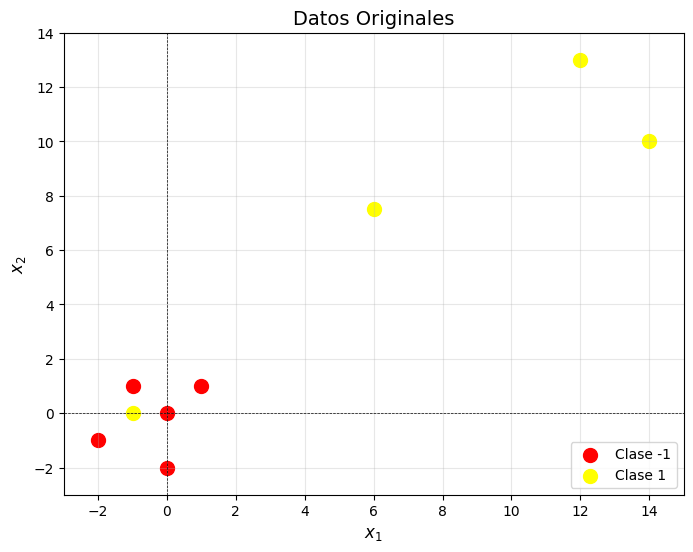

In [ ]:
# Configurar colores y etiquetas para las dos clases
colors = ['red' if label == -1 else 'blue' for label in y]
labels = ['Clase -1' if label == -1 else 'Clase +1' for label in y]

# Crear gráfico
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(y)):
    plt.scatter(X[y == label, 0], X[y == label, 1],
                color='red' if label == -1 else 'yellow',
                label=f'Clase {label}', s=100)

# Ajustar límites de los ejes
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Configurar el gráfico
plt.title("Datos Originales", fontsize=14)
plt.xlabel(r"$x_1$", fontsize=12)
plt.ylabel(r"$x_2$", fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## a. Aplicar una máquina de soporte vectorial para separar las dos categorías linealmente.

El problema puede ser resuelto como:
$$
P \begin{cases}
\min \quad \frac{1}{2} \mathbf{x}^t \mathbf{H} \mathbf{x} + \mathbf{d}^t \mathbf{x} \\
\text{sujeto a} \quad \mathbf{A} \mathbf{x} \leq \mathbf{b}
\end{cases}
$$

La solución no es factible. Mensaje del optimizador: Positive directional derivative for linesearch


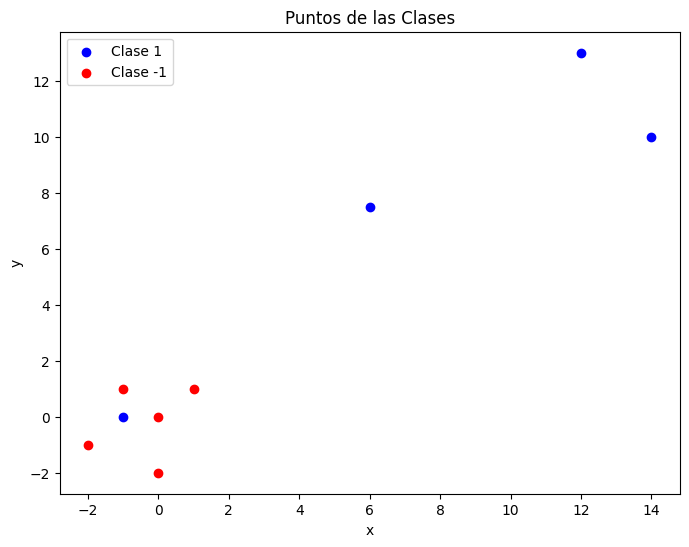

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def train_svm_primal(X, y):
    """
    Entrena el modelo SVM lineal sin margen relajado utilizando optimización cuadrática.

    Args:
        X (ndarray): Matriz de características (n_samples x n_features).
        y (ndarray): Vector de etiquetas (+1 o -1).

    Returns:
        w (ndarray): Vectores de pesos del modelo.
        b (float): Sesgo del modelo.
        result: Resultado de la optimización
    """
    n_samples, n_features = X.shape

    # Función objetivo: Minimizar la norma de w
    def objective(params):
        w = params[:-1]  # Los primeros n_features son los pesos
        return 0.5 * np.dot(w, w)  # Minimizar 0.5 * ||w||^2

    # Restricciones: y_i * (w^T x_i + b) >= 1 para todo i
    def constraint(params):
        w = params[:-1]
        b = params[-1]
        return [y[i] * (np.dot(w, X[i]) + b) - 1 for i in range(n_samples)]

    # Inicialización: Estimación inicial de los pesos y sesgo
    initial_params = np.zeros(n_features + 1)  # Inicializamos los pesos y el sesgo a 0

    # Restricciones para el optimizador (y_i * (w^T x_i + b) >= 1)
    cons = ({'type': 'ineq', 'fun': constraint})

    # Llamada a scipy.optimize.minimize para resolver el problema
    result = minimize(objective, initial_params, constraints=cons, method='SLSQP')

    # Verificación de si la solución es factible
    if result.success:
        w = result.x[:-1]
        b = result.x[-1]
        print("Pesos (w):", w)
        print("Sesgo (b):", b)
    else:
        print("La solución no es factible. Mensaje del optimizador:", result.message)
        w, b = None, None

    return w, b, result

def plot_svm(X, y):
    """
    Dibuja los puntos de las clases sin el hiperplano separador.

    Args:
        X (ndarray): Matriz de características (n_samples x n_features).
        y (ndarray): Vector de etiquetas (+1 o -1).
    """
    # Crear el gráfico
    plt.figure(figsize=(8,6))

    # Dibujar los puntos de las dos clases
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Clase -1')

    # Configurar el gráfico
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Puntos de las Clases')
    plt.legend()
    plt.show()

# Entrenar el modelo SVM lineal sin margen relajado
w, b, result = train_svm_primal(X, y)

# Dibujar solo los puntos
plot_svm(X, y)



```
Positive directional derivative for linesearch
```
El método de optimización de la función minimize de scipy usualmente trabaja escogiendo una dirección de descenso, y haciendo una búsqueda lineal a esa dirección. Este mensaje muestra que el optimizador se ha estancado en una posición que hace que no se encuentre una dirección en la que la función objetivo descienda.

Dado el solapamiento entre las clases, no es posible encontrar una solución que separe perfectamente los datos. Una SVM con margen rígido no es adecuada para estos datos. Para manejar esta situación, sería mejor utilizar una SVM de margen suave, donde se permite cierto error de clasificación (introduciendo variables de holgura). También sería útil explorar kernels no lineales, como polinómico si las clases no son separables linealmente en el espacio original. Ambas propuestas son los apartados b y c del propio ejercicio.

Observamos un punto que podría estar mal clasificado en las etiquetas (el punto de la Clase 1 es etiquetado erróneamente como Clase -1). Este tipo de error introduce confusión en la separación y puede hacer que sea imposible encontrar un hiperplano separador. Dados dichos datos, como no lo sabemos no podemos suponer nada.

Si utilizamos la librería SVC que nos va a resolver rápidamente el problema de la máquina de soporte vectorial (SVM) se encuentra una solución, pero en este caso como no se ha podido encontrar ninguna solución que separe las dos clases, lo que se hace es utilizar el método relajado.

Datos escalados:

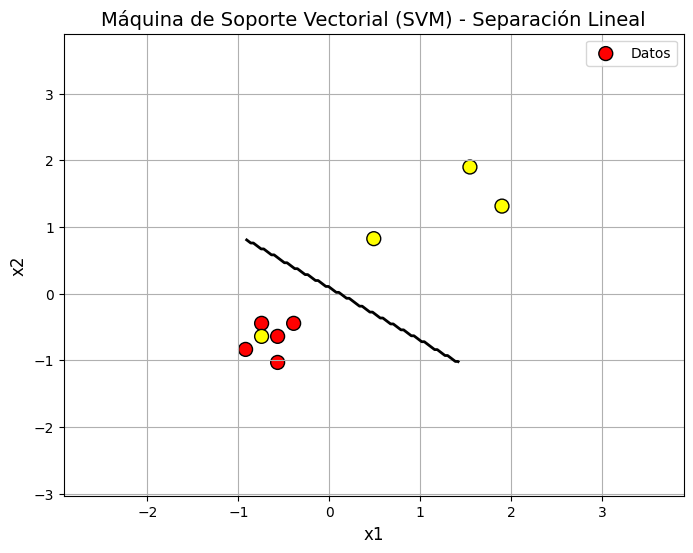

In [ ]:
# Escalar las características para mejorar el rendimiento del modelo SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear el clasificador SVM con un kernel lineal
svm = SVC(kernel='linear')

# Entrenar el modelo con los datos
svm.fit(X_scaled, y)

# Visualizar los resultados
# Crear una malla de puntos para mostrar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100),
                     np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100))

# Predecir en cada punto de la malla
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

# Graficar los puntos de datos con colores según la clase
scatter=plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn', edgecolors='k', s=100, marker='o', label='Datos')

# Graficar la frontera de decisión
contour = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# Etiquetas y título
plt.title("Máquina de Soporte Vectorial (SVM) - Separación Lineal", fontsize=14)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.legend()

# Expandir los límites de los ejes para mostrar más área
plt.xlim(X_scaled[:, 0].min() - 2, X_scaled[:, 0].max() + 2)  # Expandir el eje x
plt.ylim(X_scaled[:, 1].min() - 2, X_scaled[:, 1].max() + 2)  # Expandir el eje y

plt.grid(True)
plt.show()

Ídem que apartado anterior, pero en este caso no escalamos los datos. El modelo SVM proporciona una buena separación general entre las categorías, como se observa por la ubicación del hiperplano. Sin embargo, la presencia del punto amarillo dentro del área de los puntos rojos indica que los datos no son perfectamente separables de forma lineal

Datos sin escalar:

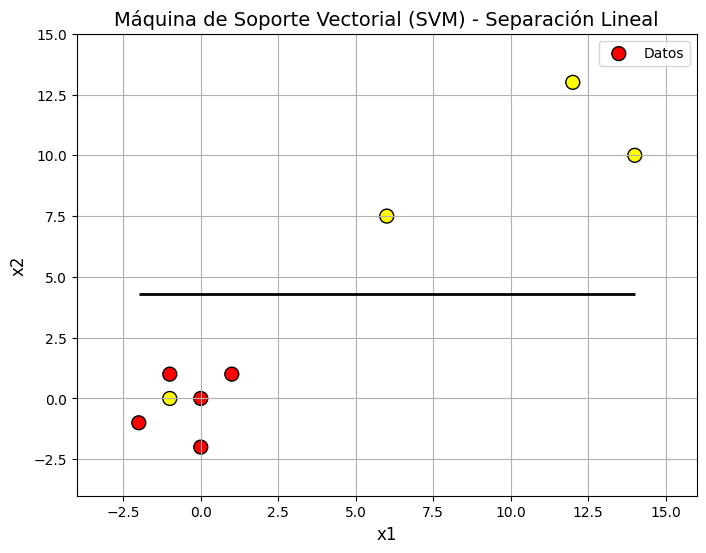

In [ ]:
# Crear el clasificador SVM con un kernel lineal
svm = SVC(kernel='linear')

# Entrenar el modelo con los datos sin escalar
svm.fit(X, y)

# Visualizar los resultados
# Crear una malla de puntos para mostrar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Predecir en cada punto de la malla
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

# Graficar los puntos de datos con colores según la clase
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k', s=100, marker='o', label='Datos')

# Graficar la frontera de decisión
contour = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# Etiquetas y título
plt.title("Máquina de Soporte Vectorial (SVM) - Separación Lineal", fontsize=14)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.legend()

# Expandir los límites de los ejes para mostrar más área
plt.xlim(X[:, 0].min() - 2, X[:, 0].max() + 2)  # Expandir el eje x
plt.ylim(X[:, 1].min() - 2, X[:, 1].max() + 2)  # Expandir el eje y

plt.grid(True)
plt.show()


## b. Aplicar el modelo relajado con distintos valores del parámetro C > 0 para resolver el problema de clasificación. Mostrar gráficamente cómo clasifican los distintos modelos.

$$
P_C \begin{cases}
\min_{\mathbf{w}, b} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \left( \sum_{i=1}^m \xi_i \right) \\
\text{sujeto a} \quad y^i (\mathbf{w}^t \mathbf{x}^i - b) \geq 1 - \xi_i, \quad \forall i \in \{1, 2, \dots, m\} \\
\quad \xi_i \geq 0, \quad \forall i \in \{1, 2, \dots, m\}
\end{cases}
$$

Para C= 0.001
El estado de la solución es:  optimal
Pesos (w): [0.03099923 0.03050079]
Sesgo (b): -0.9209329851397644
Para C= 0.01
El estado de la solución es:  optimal
Pesos (w): [0.08333333 0.08333333]
Sesgo (b): -1.0000000002138012
Para C= 0.1
El estado de la solución es:  optimal
Pesos (w): [0.11068792 0.18848993]
Sesgo (b): -1.0778020070103165
Para C= 1
El estado de la solución es:  optimal
Pesos (w): [4.11188144e-10 3.07692307e-01]
Sesgo (b): -1.3076923069077968


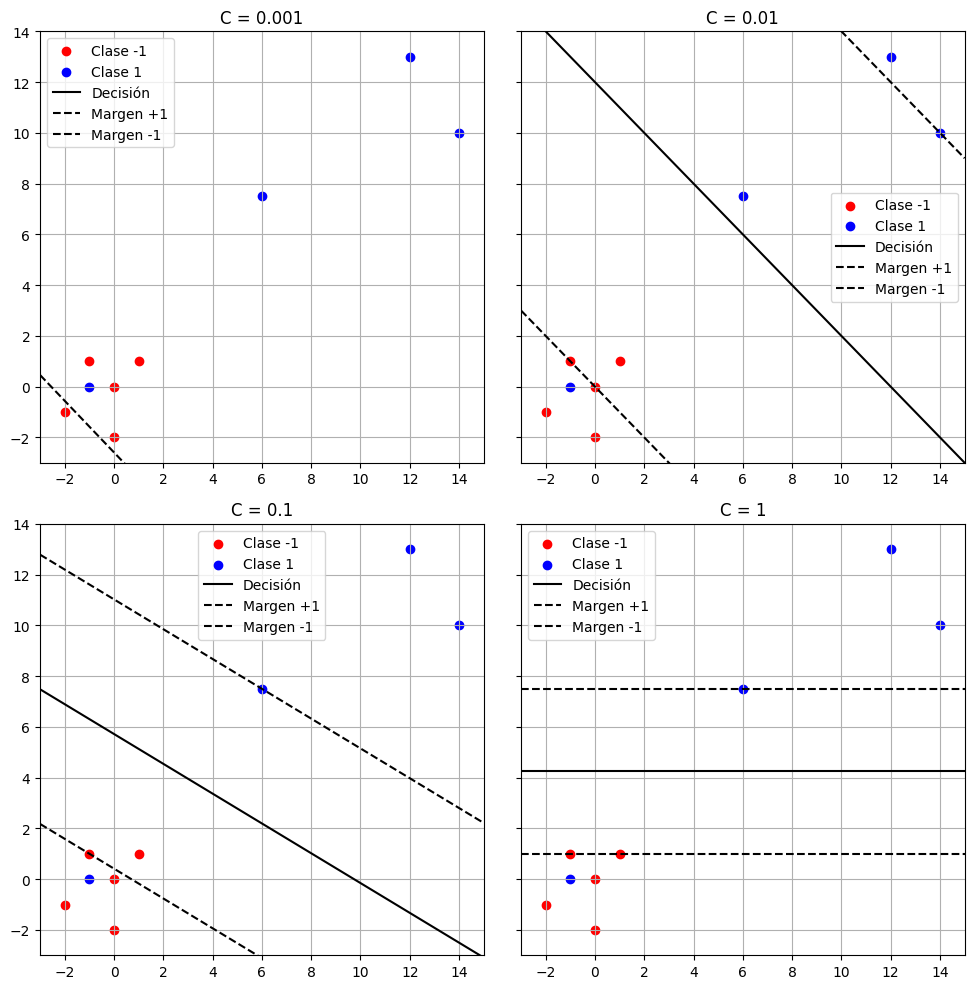

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Datos de ejemplo
colors = ['red' if label == 1 else 'blue' for label in y]
color_labels = ['red', 'blue']
# Parámetros
n_samples, n_features = X.shape
C_values = [0.001, 0.01, 0.1, 1]  # Distintos valores de C

# Crear subplots para graficar
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
axes = axes.flatten()

for idx, C in enumerate(C_values):
    # Variables de optimización
    w = cp.Variable(n_features)
    b = cp.Variable()
    xi = cp.Variable(n_samples)

    # Función objetivo
    objective = cp.Minimize(0.5 * cp.norm(w, 2)**2 + C * cp.sum(xi))

    # Restricciones
    constraints = [
        cp.multiply(y, X @ w + b) >= 1 - xi,
        xi >= 0
    ]

    # Resolver problema
    problem = cp.Problem(objective, constraints)
    problem.solve()


    # Obtener pesos y sesgo
    w_value = w.value
    b_value = b.value
    print('Para C=',C)
    print("El estado de la solución es: ", problem.status)
    print("Pesos (w):", w_value)
    print("Sesgo (b):", b_value)

    # Graficar datos
    ax = axes[idx]
    for i, label in enumerate(np.unique(y)):
        ax.scatter(X[y.flatten() == label, 0], X[y.flatten() == label, 1], label=f"Clase {label}", c = color_labels[i % len(color_labels)])
    # Generar la recta de decisión y márgenes
    x1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    if w_value[1] != 0:  # Evitar división por cero
        x2_decision = -(w_value[0] * x1 + b_value) / w_value[1]
        x2_margin_up = -(w_value[0] * x1 + b_value - 1) / w_value[1]
        x2_margin_down = -(w_value[0] * x1 + b_value + 1) / w_value[1]

        # Graficar recta de decisión y márgenes
        ax.plot(x1, x2_decision, 'k-', label='Decisión')
        ax.plot(x1, x2_margin_up, 'k--', label='Margen +1')
        ax.plot(x1, x2_margin_down, 'k--', label='Margen -1')
    else:
        ax.axvline(-b_value / w_value[0], color='k', linestyle='-', label='Decisión')
        ax.axvline((-b_value + 1) / w_value[0], color='k', linestyle='--', label='Margen +1')
        ax.axvline((-b_value - 1) / w_value[0], color='k', linestyle='--', label='Margen -1')

    # Configuración del gráfico
    ax.set_title(f'C = {C}')
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()


El modelo relajado nos introduce como ventaja que se puede relajar el modelo de optimización para penalizar los puntos que están mal clasificados. Para ello, se incluyen $m$ varaibles $\xi_i \geq 0$ para identificar aquellos puntos $x^i$ que no están en el lado correcto de la franja separadora.

Observamos que para valores altos de $C$, el hiperplano separador estrecha la anchura de la franja para acoger el máximo número de vectores y que no sean penalizados. Por otra parte, para valores bajos de $C$, la anchura de la franja se amplía pues se penalizan menos los vectores mal clasificados.

## c. Utilizar un kernel polinómico que consideres apropiado para resolver el problema de clasificación binaria. Si no fuera posible, utilizar con el kernel polinómico el enfoque relajado variando el parámetro C. También mostrar gráficamente cómo clasifican los distintos modelos.

$$
D_C \begin{cases}
\max_{\boldsymbol{\alpha} \in \mathbb{R}^m} \quad \left\{ \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i y^i K_{ij} y^j \alpha_j \right\} \\
\text{sujeto a} \quad \sum_{i=1}^m \alpha_i y^i = 0 \\
\quad 0 \leq \alpha_i \leq C, \quad \forall i \in \{1, 2, \dots, m\}
\end{cases}
$$

donde $K$ es la función Kernel elegida, en este caso se nos pide una función kernel polinómica. Al realizar varias pruebas hemos determinado que la mejor función polinómica que se ajusta a nuestro problema es de grado 3.

Accuracy para C = 0.0001: 0.8889
Accuracy para C = 1: 0.8889
Accuracy para C = 100: 1.0000
Accuracy para C = 10000: 0.7778


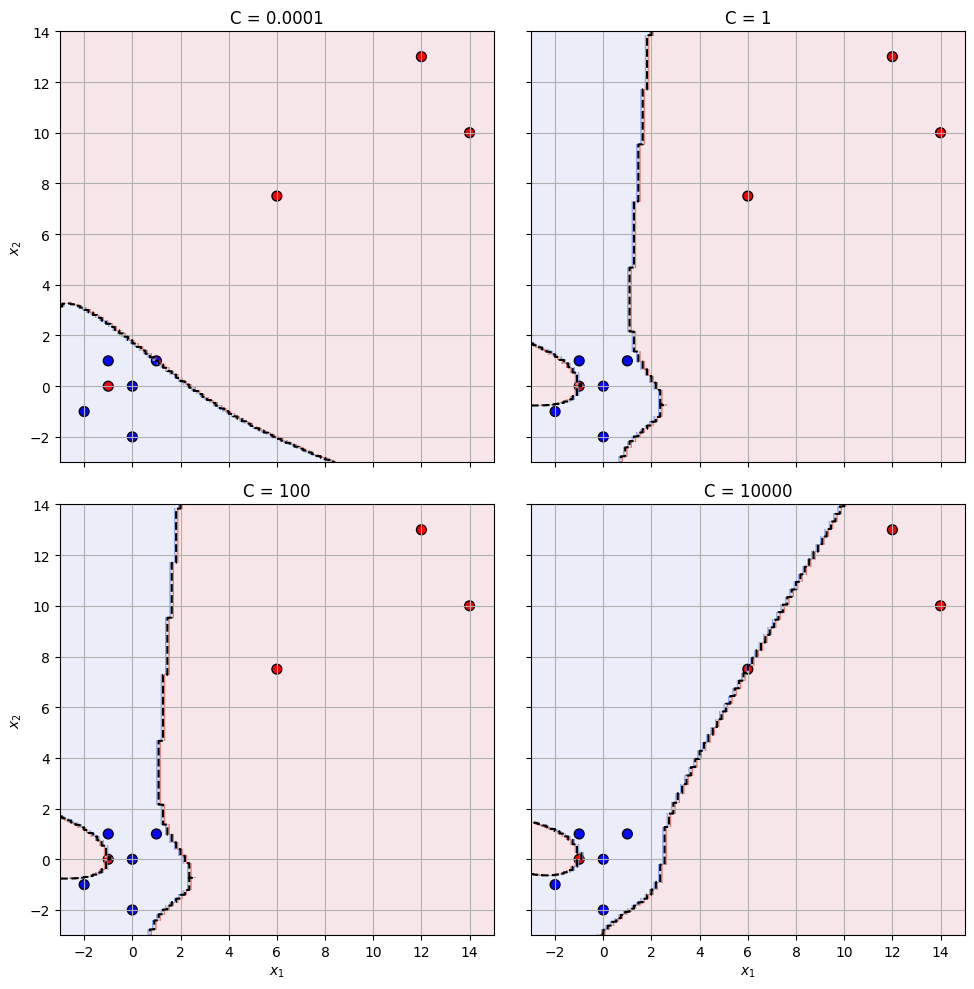

In [ ]:
# Parámetros
n_samples = X.shape[0]
C_values = [0.0001, 1, 100, 10000]  # Distintos valores de C
degree = 3 # Grado del kernel polinómico

# Función para calcular la matriz de kernel polinómico
def polynomial_kernel(X1, X2, degree=3):
    return (1 + np.dot(X1, X2.T)) ** degree

# Calcular matriz del kernel
K = polynomial_kernel(X, X, degree=degree)

# Crear subplots para graficar
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex = True, sharey=True)
colors = ['red' if label == 1 else 'blue' for label in y]
axes = axes.ravel()  # Convertir a array unidimensional

def predict(X_new):
    K_new = polynomial_kernel(X_new, X, degree=degree)  # Kernel entre puntos nuevos y datos de entrenamiento
    decision = np.dot(K_new, alpha_opt * y) - b
    return np.sign(decision)  # Devuelve +1 o -1 según el signo de la función de decisión

accuracies = []

for idx, C in enumerate(C_values):
    # Variables de optimización
    alpha = cp.Variable(n_samples)

    # Función objetivo
    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(cp.multiply(y, alpha), K))

    # Restricciones
    constraints = [
        alpha >= 0,
        alpha <= C,
        cp.sum(cp.multiply(alpha, y)) == 0
    ]

    # Resolver problema
    problem = cp.Problem(objective, constraints)
    problem.solve(cp.SCS)

    # Obtener valores de alpha
    alpha_opt = alpha.value

    support_vectors = np.where((alpha_opt > 1e-5) & (alpha_opt < C))[0]
    # Identificar vectores soporte
    support_vectors_positive = [i for i in support_vectors if y[i] == 1]  # y^h = 1
    support_vectors_negative = [i for i in support_vectors if y[i] == -1]  # y^k = -1

    # Calcular bias (b)
    b = np.mean(
        y[support_vectors] - np.sum(alpha_opt * y * K[support_vectors], axis=1)
    )
    b = np.mean(
        np.sum(alpha_opt * y * K[support_vectors_positive]) + np.sum(alpha_opt * y * K[support_vectors_negative])
    )

    # Graficar datos
    ax = axes[idx]
    ax.scatter(X[:, 0], X[:, 1], c=colors, label='Datos', s=50, edgecolors='k')

    # Graficar límites de decisión
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 10000))
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap=plt.cm.coolwarm, alpha=0.1)
    ax.contour(xx, yy, Z, levels=[0], colors='k', linestyles=['--'])

    ax.set_title(f'C = {C}')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid()
    y_pred = predict(X)
    accuracy = np.mean(y_pred == y)
    accuracies.append(accuracy)
    print(f"Accuracy para C = {C}: {accuracy:.4f}")

axes[2].set_xlabel(r'$x_1$')
axes[3].set_xlabel(r'$x_1$')

axes[0].set_ylabel(r'$x_2$')
axes[2].set_ylabel(r'$x_2$')

plt.tight_layout()
plt.show()

**C = 0.0001**:  
   - Precisión: 88.89%. Este valor pequeño de $C$ indica una alta regularización. El modelo prioriza márgenes grandes, lo que puede llevar a que no clasifique correctamente los puntos cercanos a la frontera de decisión. El resultado es una precisión moderada.
   
**C = 100**:  
   - Precisión: 100.00%. Con un valor más alto de $C$, el modelo reduce la penalización por clasificar mal los puntos en el margen y se ajusta más a los datos, logrando una clasificación perfecta en este caso.

**C = 10000**:  
   - Precisión: 77.78%. Un $C$ extremadamente grande indica muy poca regularización, lo que hace que el modelo se ajuste demasiado a los datos de entrenamiento, posiblemente sobreajustándose (overfitting).

# Ejercicio 2

A partir de los datos del fichero square4.txt o square4.xlsx:


In [ ]:
# Leemos el dataset subido al repositorio:
df1 = pd.read_csv('Practica_4_MOPT/square4.txt', sep=',', skiprows=1, names=['x1', 'x2', 'y'], encoding='latin-1')

# Verificamos los primeros registros y obeservamos que tiene 2 variables independientes (x1,x2) y una variable dependiente (y)
print(df1.head())

        x1        x2  y
0  6.28531  11.58790  0
1  9.39775   5.44890  0
2  5.73624   8.68033  0
3  6.10197   9.83266  0
4  9.29479   5.67373  0


In [ ]:
# Extraemos las características (X) y las etiquetas (y)
X2 = df1[['x1', 'x2']].values  # Convertir a matriz NumPy
y2 = df1['y'].values           # Convertir a vector NumPy

Grafiquemos los datos dados

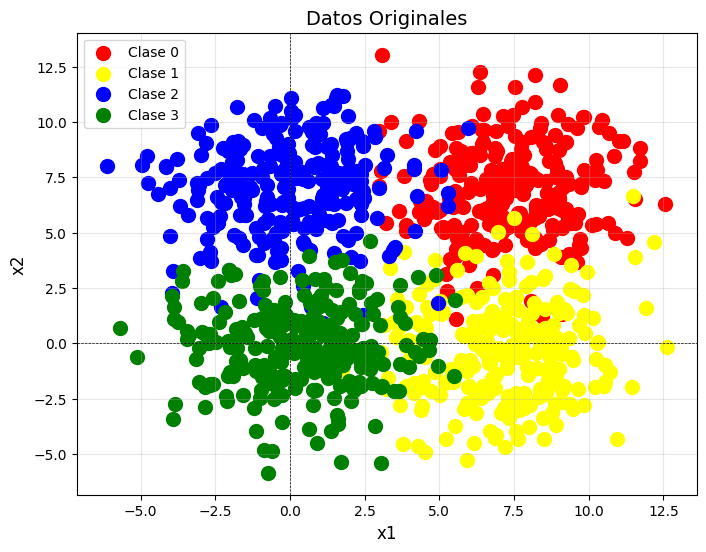

In [ ]:
# Configurar colores para cada clase
colors = ['red', 'yellow', 'blue', 'green']
labels = [f'Clase {label}' for label in np.unique(y2)]

# Crear gráfico
plt.figure(figsize=(8, 6))

# Graficar cada clase con un color y etiqueta únicos
for i, label in enumerate(np.unique(y2)):
    plt.scatter(X2[y2 == label, 0], X2[y2 == label, 1],
                color=colors[i],
                label=f'Clase {label}',
                s=100)

# Ajustar límites de los ejes
plt.xlim(X2[:, 0].min() - 1, X2[:, 0].max() + 1)
plt.ylim(X2[:, 1].min() - 1, X2[:, 1].max() + 1)

# Configurar el gráfico
plt.title("Datos Originales", fontsize=14)
plt.xlabel("x1", fontsize=12)
plt.ylabel("x2", fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Línea horizontal en el origen
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Línea vertical en el origen
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## a. Aplica una máquina de soporte vectorial para separar las categorías 0 y 2 linealmente.

El sigueinte código aplica una Máquina de Soporte Vectorial (SVM) lineal sin margen relajado (hard-margin SVM) para clasificar datos en las categorías 0 y 2, resolviendo el problema de optimización.

La solución no es factible. Mensaje del optimizador: Positive directional derivative for linesearch


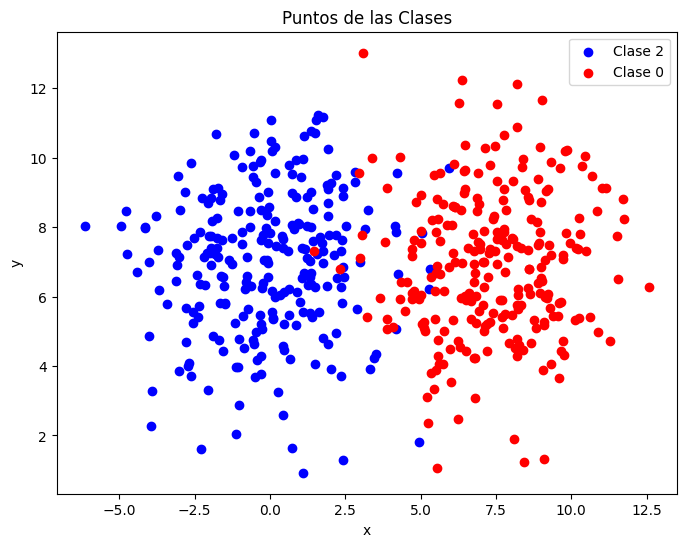

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def train_svm_primal(X, y):
    """
    Entrena el modelo SVM lineal sin margen relajado utilizando optimización cuadrática.

    Args:
        X (ndarray): Matriz de características (n_samples x n_features).
        y (ndarray): Vector de etiquetas (+1 o -1).

    Returns:
        w (ndarray): Vectores de pesos del modelo.
        b (float): Sesgo del modelo.
        result: Resultado de la optimización
    """
    n_samples, n_features = X.shape

    # Función objetivo: Minimizar la norma de w
    def objective(params):
        w = params[:-1]  # Los primeros n_features son los pesos
        return 0.5 * np.dot(w, w)  # Minimizar 0.5 * ||w||^2

    # Restricciones: y_i * (w^T x_i + b) >= 1 para todo i
    def constraint(params):
        w = params[:-1]
        b = params[-1]
        return [y[i] * (np.dot(w, X[i]) + b) - 1 for i in range(n_samples)]

    # Inicialización: Estimación inicial de los pesos y sesgo
    initial_params = np.zeros(n_features + 1)  # Inicializamos los pesos y el sesgo a 0

    # Restricciones para el optimizador (y_i * (w^T x_i + b) >= 1)
    cons = ({'type': 'ineq', 'fun': constraint})

    # Llamada a scipy.optimize.minimize para resolver el problema
    result = minimize(objective, initial_params, constraints=cons, method='SLSQP')

    # Verificación de si la solución es factible
    if result.success:
        w = result.x[:-1]
        b = result.x[-1]
        print("Pesos (w):", w)
        print("Sesgo (b):", b)
    else:
        print("La solución no es factible. Mensaje del optimizador:", result.message)
        w, b = None, None

    return w, b, result

def plot_svm(X, y):
    """
    Dibuja los puntos de las clases sin el hiperplano separador.

    Args:
        X (ndarray): Matriz de características (n_samples x n_features).
        y (ndarray): Vector de etiquetas (+1 o -1).
    """
    # Crear el gráfico
    plt.figure(figsize=(8,6))

    # Dibujar los puntos de las dos clases
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 2')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Clase 0')

    # Configurar el gráfico
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Puntos de las Clases')
    plt.legend()
    plt.show()

# Filtrar las categorías 0 y 2 de los datos
mask = (y2 == 0) | (y2 == 2)
X_filtered = X2[mask]
y_filtered = y2[mask]

# Convertir las etiquetas de 0 y 2 a -1 y +1
y_binary = np.where(y_filtered == 0, -1, 1)

# Entrenar el modelo SVM lineal sin margen relajado
w, b, result = train_svm_primal(X_filtered, y_binary)

# Dibujar solo los puntos
plot_svm(X_filtered, y_binary)

Los resultados muestran que el optimizador no pudo encontrar una solución factible al problema de clasificación utilizando el modelo SVM. Existe una separación visible entre las dos clases, pero no es perfectamente lineal. Algunos puntos de las clases se solapan, especialmente cerca de la frontera entre las dos regiones.

Alguna una recomendación podría ser usar un SVM con margen relajado:
Se puede ajustar el parámetro de regularización C para controlar el equilibrio entre el margen ancho y las violaciones a las restricciones.

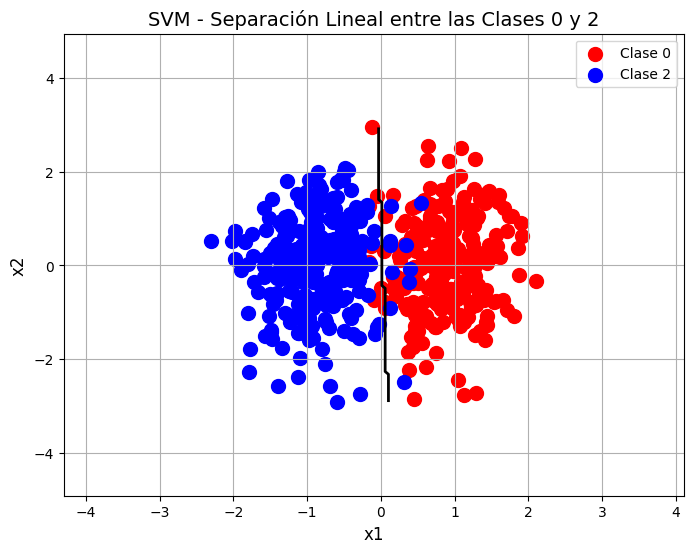

In [ ]:
filtrado = (y2 == 0) | (y2 == 2)  # Filtra las clases 0 y 2
X_filtered = X2[filtrado]
y_filtered = y2[filtrado]

# Escalar las características para mejorar el rendimiento del modelo SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Crear el clasificador SVM con un kernel lineal
svm = SVC(kernel='linear')

# Entrenar el modelo con los datos
svm.fit(X_scaled, y_filtered)


# Visualizar los resultados
# Crear una malla de puntos para mostrar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100),
                     np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100))

# Predecir en cada punto de la malla
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

# Asignar colores manualmente para las clases 0 y 2 (rojo y azul)
colors = {0: 'red', 2: 'blue'}

# Graficar los puntos con los colores correspondientes
for label in np.unique(y_filtered):
    plt.scatter(X_scaled[y_filtered == label, 0], X_scaled[y_filtered == label, 1],
                color=colors[label],
                label=f'Clase {label}',
                s=100)

# Graficar la frontera de decisión
contour = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# Etiquetas y título
plt.title("SVM - Separación Lineal entre las Clases 0 y 2", fontsize=14)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.legend()

# Expandir los límites de los ejes para mostrar más área
plt.xlim(X_scaled[:, 0].min() - 2, X_scaled[:, 0].max() + 2)  # Expandir el eje x
plt.ylim(X_scaled[:, 1].min() - 2, X_scaled[:, 1].max() + 2)  # Expandir el eje y
plt.grid(True)
plt.show()

Comparando con el modelo SVM implementado en  la librería como scikit-learn observamos que esta generalmente utiliza un SVM con margen relajado por defecto. Esto significa que permite ciertos errores de clasificación para poder encontrar un hiperplano separador incluso cuando los datos no son perfectamente separables de manera lineal.

## b. Aplica el modelo relajado con distintos valores del parámetro C>0 para resolver el problema de clasificación.


El estado de la solución es:  optimal
para C= 1 tenemos que
Pesos (w): [-0.87059266 -0.08265121]
Sesgo (b): 3.698387431018112


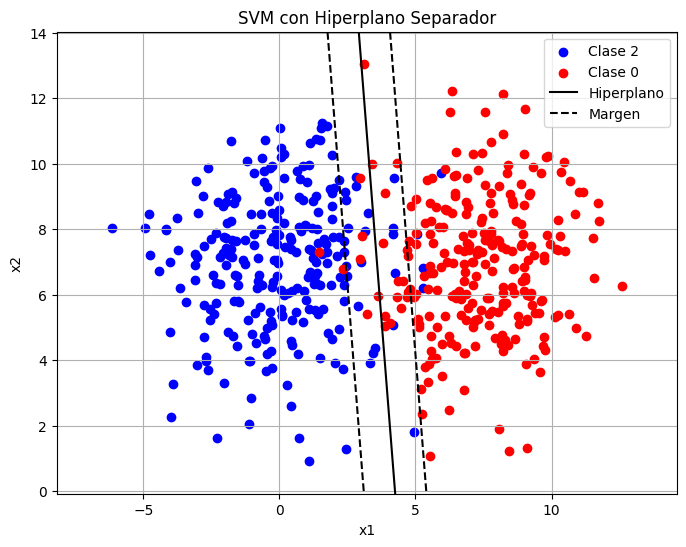

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

def train_svm_cvxpy(X, y, C=1):
    """
    Entrena un modelo SVM usando CVXPY.

    Args:
        X (ndarray): Matriz de características (n_samples x n_features).
        y (ndarray): Vector de etiquetas (+1 o -1).
        C (float): Parámetro de penalización.

    Returns:
        w (ndarray): Vector de pesos del modelo.
        b (float): Sesgo del modelo.
    """
    n_samples, n_features = X.shape

    # Variables de optimización
    w = cp.Variable(n_features)
    b = cp.Variable()
    xi = cp.Variable(n_samples)

    # Función objetivo
    objective = cp.Minimize(0.5 * cp.sum_squares(w) + C * cp.sum(xi))

    # Restricciones
    constraints = [
        y[i] * (X[i] @ w + b) >= 1 - xi[i] for i in range(n_samples)
    ] + [xi >= 0]

    # Resolver problema
    problem = cp.Problem(objective, constraints)
    problem.solve(cp.SCS)
    print("El estado de la solución es: ", problem.status)
    return w.value, b.value

def plot_svm(X, y, w, b):
    """
    Dibuja los puntos de las clases y el hiperplano separador.

    Args:
        X (ndarray): Matriz de características (n_samples x n_features).
        y (ndarray): Vector de etiquetas (+1 o -1).
        w (ndarray): Vector de pesos del modelo.
        b (float): Sesgo del modelo.
    """
    plt.figure(figsize=(8, 6))

    # Dibujar los puntos de las dos clases
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 2')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Clase 0')

    # Dibujar el hiperplano: w * x + b = 0
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx = np.linspace(x_min, x_max, 100)
    yy = -(w[0] * xx + b) / w[1]

    # Dibujar márgenes
    margin1 = -(w[0] * xx + b - 1) / w[1]
    margin2 = -(w[0] * xx + b + 1) / w[1]

    plt.plot(xx, yy, 'k-', label='Hiperplano')
    plt.plot(xx, margin1, 'k--', label='Margen')
    plt.plot(xx, margin2, 'k--')

    # Configurar el gráfico
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('SVM con Hiperplano Separador')
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    plt.legend()
    plt.grid()
    plt.show()

# Ejemplo de uso con datos X2 y y2
# Filtrar las categorías 0 y 2
mask = (y2 == 0) | (y2 == 2)
X_filtered = X2[mask]
y_filtered = y2[mask]

# Convertir etiquetas a -1 y +1
y_binary = np.where(y_filtered == 0, -1, 1)

# Entrenar el modelo SVM
w, b = train_svm_cvxpy(X_filtered, y_binary, C=1)

# Imprimir los resultados
print('para C=', 1, 'tenemos que')
print("Pesos (w):", w)
print("Sesgo (b):", b)

# Dibujar el hiperplano separador
plot_svm(X_filtered, y_binary, w, b)


## c. Determinar para este problema cuál puede ser el parámetro C más adecuado. Justificar la respuesta.


Entrenando con C = 0.001
El estado de la solución es:  optimal
Precisión para C = 0.001: 0.96

Entrenando con C = 0.1
El estado de la solución es:  optimal
Precisión para C = 0.1: 0.96

Entrenando con C = 1
El estado de la solución es:  optimal
Precisión para C = 1: 0.97

Entrenando con C = 100
El estado de la solución es:  optimal
Precisión para C = 100: 0.97


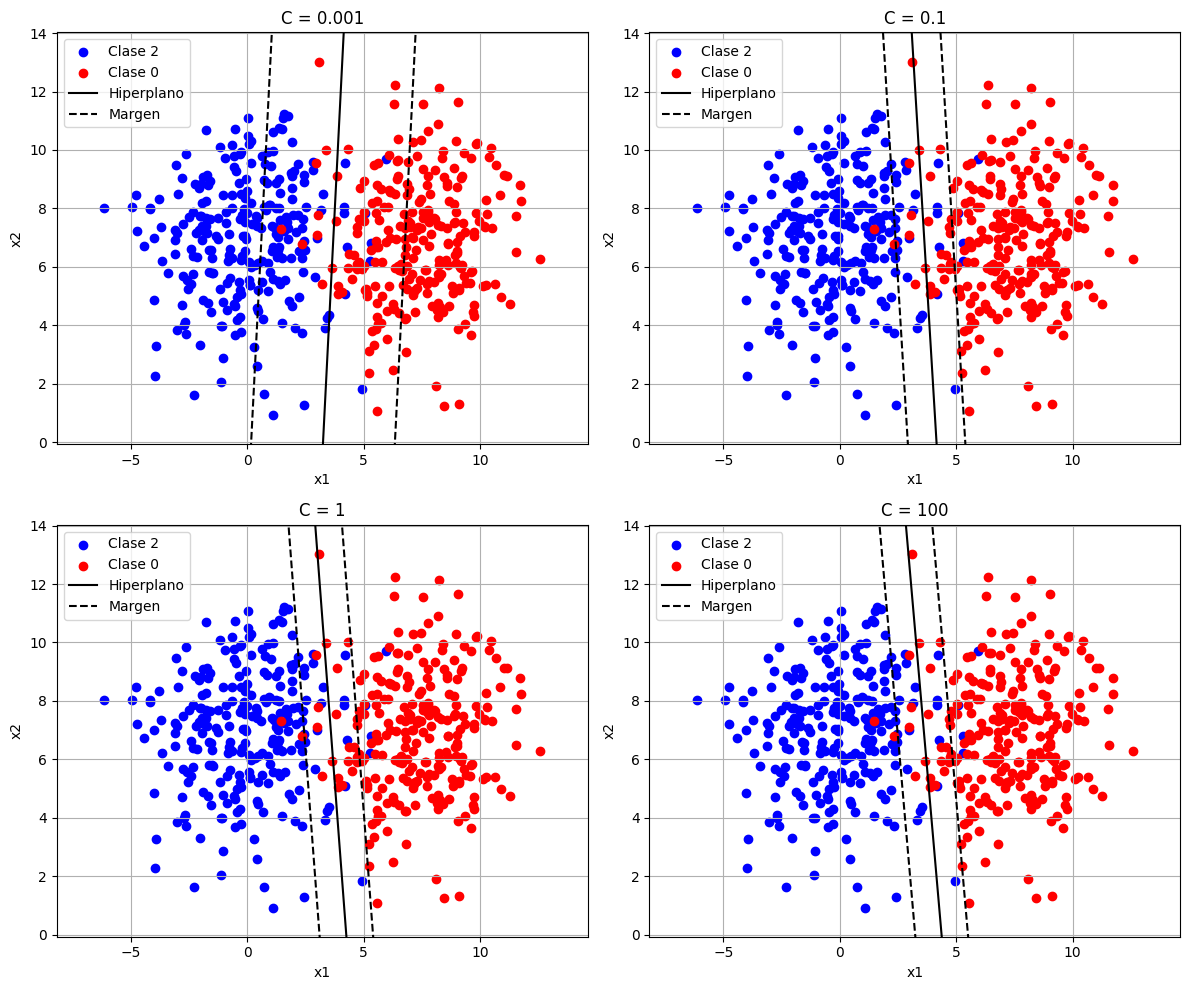

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def train_svm_cvxpy(X, y, C=1):
    """
    Entrena un modelo SVM usando CVXPY.

    Args:
        X (ndarray): Matriz de características (n_samples x n_features).
        y (ndarray): Vector de etiquetas (+1 o -1).
        C (float): Parámetro de penalización.

    Returns:
        w (ndarray): Vector de pesos del modelo.
        b (float): Sesgo del modelo.
    """
    n_samples, n_features = X.shape

    # Variables de optimización
    w = cp.Variable(n_features)
    b = cp.Variable()
    xi = cp.Variable(n_samples)

    # Función objetivo
    objective = cp.Minimize(0.5 * cp.sum_squares(w) + C * cp.sum(xi))

    # Restricciones
    constraints = [
        y[i] * (X[i] @ w + b) >= 1 - xi[i] for i in range(n_samples)
    ] + [xi >= 0]

    # Resolver problema
    problem = cp.Problem(objective, constraints)
    problem.solve(cp.SCS)
    print("El estado de la solución es: ", problem.status)
    return w.value, b.value

def predict_svm(X, w, b):
    """
    Realiza predicciones con el modelo SVM.

    Args:
        X (ndarray): Matriz de características.
        w (ndarray): Vector de pesos del modelo.
        b (float): Sesgo del modelo.

    Returns:
        y_pred (ndarray): Predicciones (+1 o -1).
    """
    return np.sign(X @ w + b)

def calculate_accuracy(y_true, y_pred):
    """
    Calcula la precisión del modelo.

    Args:
        y_true (ndarray): Etiquetas reales.
        y_pred (ndarray): Etiquetas predichas.

    Returns:
        accuracy (float): Precisión del modelo.
    """
    return accuracy_score(y_true, y_pred)

# Datos de ejemplo (X2 y y2 deben definirse previamente)
mask = (y2 == 0) | (y2 == 2)
X_filtered = X2[mask]
y_filtered = y2[mask]

# Convertir etiquetas a -1 y +1
y_binary = np.where(y_filtered == 0, -1, 1)

# Valores de C
C_values = [0.001, 0.1, 1, 100]

# Entrenar el modelo y calcular precisión
results = []
for C in C_values:
    print(f"\nEntrenando con C = {C}")
    w, b = train_svm_cvxpy(X_filtered, y_binary, C=C)
    results.append((w, b))

    # Realizar predicciones
    y_pred = predict_svm(X_filtered, w, b)

    # Calcular precisión
    accuracy = calculate_accuracy(y_binary, y_pred)
    print(f"Precisión para C = {C}: {accuracy:.2f}")

# Dibujar subplots con los hiperplanos
def plot_svm_subplots(X, y, C_values, results):
    n = len(C_values)
    rows = int(np.ceil(n / 2))  # Número de filas necesarias para subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for i, C in enumerate(C_values):
        w, b = results[i]

        # Dibujar los puntos de las dos clases
        ax = axes[i]
        ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 2')
        ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Clase 0')

        # Dibujar el hiperplano
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        xx = np.linspace(x_min, x_max, 100)
        yy = -(w[0] * xx + b) / w[1]

        # Dibujar márgenes
        margin1 = -(w[0] * xx + b - 1) / w[1]
        margin2 = -(w[0] * xx + b + 1) / w[1]

        ax.plot(xx, yy, 'k-', label='Hiperplano')
        ax.plot(xx, margin1, 'k--', label='Margen')
        ax.plot(xx, margin2, 'k--')

        # Configurar el subplot
        ax.set_title(f'C = {C}')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
        ax.legend()
        ax.grid()

    # Eliminar subplots vacíos si hay menos de 4 gráficos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Dibujar subplots
plot_svm_subplots(X_filtered, y_binary, C_values, results)


Después de realizar varias pruebas cambiando el valor de $C$, en las gráficas se observa, que a partir de $C = 1$, los márgenes no se restringen más, y la precisión máxima alcanzada es de 0.97. No obstante, esto tampoco difiere mucho con las precisiones de $C$ más bajas, que son del 0.96.